# <center>Checking Password Strength

<b>1.Here we will check the password strength using Machine Learning algorithms.<br>
    2.We will classify the strength of password as a multiclass like the weakest password strength as 0 and 1 if the password is strong and 2 if the password is very very strong.<br>
    Thus the strength of the password is resembeled as:<br>
      0-->weak<br>
      1-->strong<br>
      2-->very strong

In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
data=pd.read_csv("data.csv",',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

Here we know that the comma acts as the separator and the error_bad_lines would tell us that if there is some error in lines and the comma separator is not correctly available then thus skip the particular lines.<br>
So here we could clearly see all the lines that are skipped.

In [6]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


From the above data we can say that each and every letter of the password help us in determining the strength of the password.<br>So we will see how our different classification models would help us in determining the strength of the password.

<b>Checking for null values and removing them

In [8]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [9]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [11]:
data.dropna(inplace=True)

<b>Converting our data into array

In [14]:
passwords_tuple=np.array(data)
passwords_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

Here we have all our passowrds arranged in order of strenghth like 1's together and then the others like a group.<br>
So we need to shuffle this for robustness

In [15]:
import random
random.shuffle(passwords_tuple)

<b> Now we will get both the dependent and independent features as X and y

In [20]:
X=[label[0] for label in passwords_tuple]                   # we could have also done this simply by using iloc of pandas with the dataset
y=[label[1] for label in passwords_tuple]

<b>Now we will try to check if the data is imbalnced or not by using a countplot

<AxesSubplot:xlabel='strength', ylabel='count'>

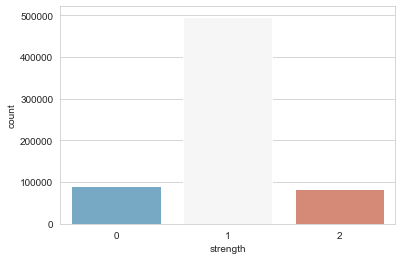

In [22]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data,palette='RdBu_r')

Now we should use some NLP techniques to convert our dependent feature into vectors.<br>
But if we convert it by word to word basis it would consume a lot of RAM and we would run into out of memory.<br>
So we will do it by letters.But our Tfidf vectorizer works on words so we will pass the function as tokenizer so that it will implemented on characters.

In [23]:
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [24]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X=vectorizer.fit_transform(X)

In [28]:
X.shape

(669639, 129)

In [29]:
vectorizer.vocabulary_

{'k': 57,
 'z': 72,
 'd': 50,
 'e': 51,
 '5': 30,
 '7': 32,
 'i': 55,
 'n': 60,
 'o': 61,
 '3': 28,
 '4': 29,
 'm': 59,
 'g': 53,
 'y': 71,
 '1': 26,
 '2': 27,
 'v': 68,
 's': 65,
 'r': 64,
 'u': 67,
 '6': 31,
 'c': 49,
 '8': 33,
 'h': 54,
 'w': 69,
 '0': 25,
 't': 66,
 'a': 47,
 '9': 34,
 'l': 58,
 'b': 48,
 'j': 56,
 'f': 52,
 '@': 40,
 '-': 22,
 'q': 63,
 'p': 62,
 'x': 70,
 '>': 38,
 '.': 23,
 '&': 17,
 '?': 39,
 '<': 36,
 ';': 35,
 '_': 45,
 '%': 16,
 '!': 12,
 '"': 13,
 '~': 76,
 '+': 21,
 '^': 44,
 '/': 24,
 '$': 15,
 ')': 19,
 ' ': 11,
 '(': 18,
 '#': 14,
 '*': 20,
 'ú': 116,
 '=': 37,
 '[': 41,
 '{': 73,
 '`': 46,
 ']': 43,
 '±': 86,
 'þ': 120,
 'ó': 110,
 '³': 88,
 'ô': 111,
 '}': 75,
 '\x16': 5,
 'ò': 109,
 '·': 91,
 '\x1e': 10,
 '\x1c': 9,
 '¿': 94,
 '\x05': 0,
 '\x1b': 8,
 'å': 100,
 '‚': 124,
 'ß': 95,
 'ð': 107,
 'â': 98,
 'ä': 99,
 '°': 85,
 '|': 74,
 '´': 89,
 '«': 84,
 '²': 87,
 '\\': 42,
 '\x08': 1,
 'ê': 104,
 'á': 97,
 '\x10': 3,
 '\x17': 6,
 '¾': 93,
 '\x19': 7,
 

In [30]:
data.iloc[0,0]

'kzde5577'

Thus we can see that our each word has been converted into 129 features and if we need to see how they are looking like.We can see it from the below code.

In [31]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.591637
5,0.567160
z,0.335920
k,0.291490
d,0.285699
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


<b>Train-test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting

# Logistic Regression

As we know Logistic regression is a binary classifier but we can convert it into multi-class classifier using the parameter multi-class.<br>

In [33]:
# Logistic regression bases on One vs Rest
from sklearn.linear_model import LogisticRegression
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# checking the score on our test dataset
print(log_class.score(X_test,y_test))

0.8128546681799176


In [35]:
#  Logistic regression bases on Multinomial
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.819821097903351


<b> Now we will try  to predict on various passwords to check the strength of the passwords

In [36]:
X_predict=np.array(["%@123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[2]


In [37]:
X_predict=np.array(["123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[1]


In [38]:
X_predict=np.array(["abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[0]


# XGBoost

In [39]:
import xgboost as xgb
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
xgb_clf.score(X_test, y_test)

0.986530075861657

<b>We will try  to predict on various passwords to check the strengths

In [46]:
X_predict=np.array(["%@123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=xgb_clf.predict(X_predict)
print(y_pred)

[2]


In [47]:
X_predict=np.array(["123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=xgb_clf.predict(X_predict)
print(y_pred)

[1]


In [48]:
X_predict=np.array(["abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=xgb_clf.predict(X_predict)
print(y_pred)

[0]


# MultinomialNB

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb_clf=MultinomialNB()
nb_clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
nb_clf.score(X_test,y_test)

0.7421375664536168

<b>We will try  to predict on various passwords to check the strengths

In [49]:
X_predict=np.array(["%@123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=nb_clf.predict(X_predict)
print(y_pred)

[2]


In [50]:
X_predict=np.array(["123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=nb_clf.predict(X_predict)
print(y_pred)

[1]


In [54]:
X_predict=np.array(["abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=nb_clf.predict(X_predict)
print(y_pred)

[1]


# Final Result

In [56]:
result=pd.DataFrame({"Models":['Logistic Regression','XGBoost','MultinomialNB'],"accuracy":[0.819,0.986,0.742]})

In [57]:
result

,Models,accuracy
0,Logistic Regression,0.819
1,XGBoost,0.986
2,MultinomialNB,0.742


Thus we can conclude that our XGBoost model performs better than the other two models with an accuracy of 0.986